/reg/d/psdm/cxi/cxilv0418/scratch/northeyt/xtcav_stats_run43.h5
<HDF5 file "xtcav_stats_run43.h5" (mode r)>
(105, 128)
[31.80609734 26.02317055 28.91463395 29.87845508 24.09552829 38.55284526
 34.69756074 35.66138187 31.80609734 26.02317055 18.3126015  26.02317055
 24.09552829 23.13170716 35.66138187 26.98699168 25.05934942 22.16788603
 18.3126015  41.44430866 29.87845508 28.91463395 21.20406489 34.69756074
 34.69756074  1.92764226 20.24024376 31.80609734 26.98699168 35.66138187
 31.80609734 21.20406489 19.27642263 24.09552829 35.66138187 26.02317055
 22.16788603 25.05934942 20.24024376 19.27642263 22.16788603 30.84227621
 26.98699168 33.7337396  28.91463395 20.24024376 30.84227621 19.27642263
 18.3126015  26.02317055 23.13170716 21.20406489 16.38495924 22.16788603
 24.09552829 24.09552829 26.98699168 23.13170716 22.16788603 20.24024376
 34.69756074 31.80609734 26.98699168 21.20406489 30.84227621 21.20406489
 22.16788603 28.91463395 25.05934942 23.13170716 25.05934942 36.625203
 25.059

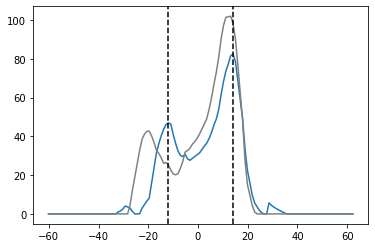

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

import sys
sys.path.append('../')
# import my functions
from define_experiment_run import experiment, run, scratch_dir, Nevents

# load h5 file
fname = '%sxtcav_stats_run%d.h5' % (scratch_dir, run)
print(fname)
f = h5py.File(fname, 'r')
print(f)
list(f.keys())
tCOM = f['tCOM'][:]
tRMS = f['tRMS'][:]
powerCOM = f['powerCOM']
powerRMS = f['powerRMS']
print(tCOM.shape)

# only look at COM now...
dt_COM = f['dt_COM']
print(dt_COM[:])
imax1_COM = f['imax1_COM'][:]
imax2_COM = f['imax2_COM'][:]
print(imax1_COM)
print(imax2_COM)
agreement = f['agreement'][:]
print('agreement:')
print(agreement)

n = 1
print(tCOM.shape)
print(imax1_COM[n])
plt.plot(tCOM[n, :], powerCOM[n, :])
plt.plot(tRMS[n, :], powerRMS[n, :], color='grey')
plt.axvline(x=tCOM[n, imax1_COM[n]], color='black', linestyle='dashed')
plt.axvline(x=tCOM[n, imax2_COM[n]], color='black', linestyle='dashed')
print(powerCOM[n, imax1_COM[n]]) # correct max for first peak
print(powerCOM[n, imax1_COM[n]-1])
print(powerCOM[n, imax1_COM[n]+1])

print(powerCOM[n, imax2_COM[n]]) # correct max for second peak
print(powerCOM[n, imax2_COM[n]-1])
print(powerCOM[n, imax2_COM[n]+1])

print('agreement = %f' % agreement[n])
print('dt = %f' % dt_COM[n])


In [7]:
n = 690
nvalid = Nevents - n
tmp = agreement[n:]
print('Equal 0:')
print(np.sum(tmp == 0))
print(np.sum(tmp > 0.9) / nvalid)
print(np.sum(tmp > 0.8) / nvalid)
print(np.sum(tmp > 0.5) / nvalid)

Equal 0:
0
0.0
0.0
0.0


In [ ]:
plt.hist(agreement[n:], bins=40)